In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temp_df = pd.read_csv(r"C:\Users\Acer\Downloads\duplicate_questions_pairs.xls")
temp_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
temp_df.shape

(404290, 6)

In [4]:
df = temp_df.iloc[:20000]
df.shape

(20000, 6)

In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['id','qid1','qid2'], inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11944\1703882840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['id','qid1','qid2'], inplace=True)


# Data Preprocessing

In [8]:
from string import punctuation
from nltk.corpus import stopwords
stop = stopwords.words("english")
sw_list = list(punctuation) + stop

In [9]:
def text_cleaner(text):
    filtered_text = []
    from nltk.tokenize import word_tokenize
    tokenize = word_tokenize(text)
    for word in tokenize:
        if word.lower() not in sw_list:
            filtered_text.append(word)
    return " ".join(filtered_text)

In [10]:
df['question1'] = df['question1'].apply(text_cleaner)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11944\2370592804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['question1'] = df['question1'].apply(text_cleaner)


In [11]:
df['question2'] = df['question2'].apply(text_cleaner)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11944\3885457803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['question2'] = df['question2'].apply(text_cleaner)


# Data Visualization

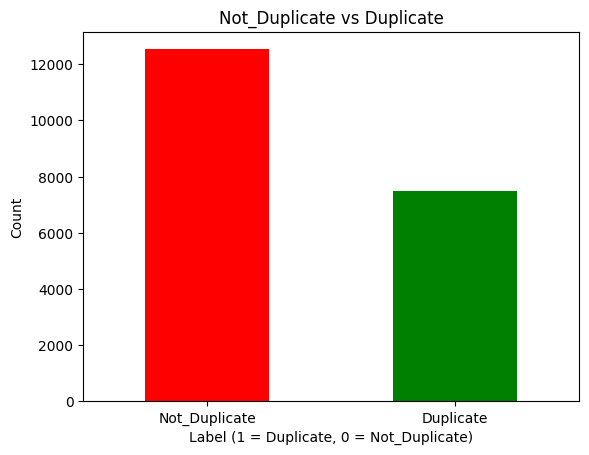

In [16]:
df['is_duplicate'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'],
                                                    title='Not_Duplicate vs Duplicate')
plt.xlabel('Label (1 = Duplicate, 0 = Not_Duplicate)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["Not_Duplicate", "Duplicate"], rotation=0)
plt.show()


# separating

In [17]:
# separating
X = df.iloc[:,0:2]
y = df['is_duplicate']

In [18]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Feature Extraction

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# Combine question1 and question2 into a single text column for training
X_train_combined = X_train['question1'] + " " + X_train['question2']
X_test_combined = X_test['question1'] + " " + X_test['question2']

# Use a single CountVectorizer for the combined text
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train_combined)
X_test_bow = vectorizer.transform(X_test_combined)

# Model applying

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm_model = LinearSVC()
svm_model.fit(X_train_bow, y_train)

y_pred_svm = svm_model.predict(X_test_bow)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.66175


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

y_pred_nb = nb_model.predict(X_test_bow)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.69475


In [ ]:
# Thank you!